In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df=pd.read_csv("penguins.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 14.4 KB


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("sex", axis=1)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"{X_train.shape}")
print(f"{X_test.shape}")

(268, 4)
(67, 4)


C:\Users\kitka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kitka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kitka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kitka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

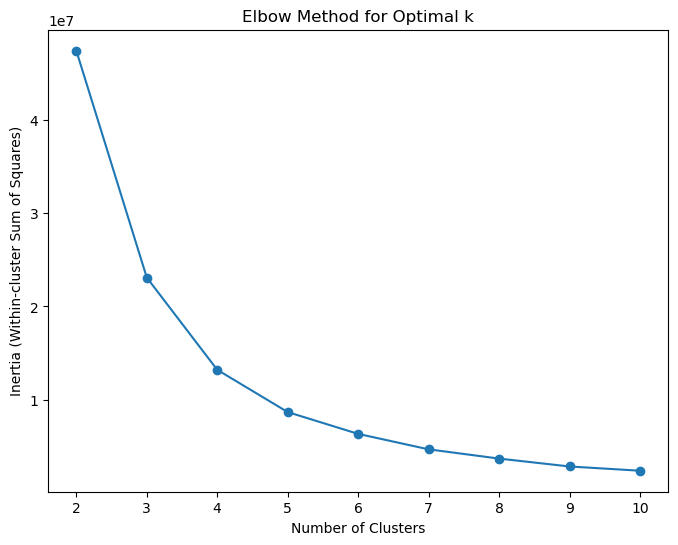

In [9]:
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

In [8]:
model = KMeans(n_clusters=6)
model.fit(df)
model.cluster_centers_

C:\Users\kitka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[4.27263736e+01, 1.84252747e+01, 1.92065934e+02, 3.76153846e+03,
        1.54945055e+00],
       [4.99387755e+01, 1.57979592e+01, 2.22142857e+02, 5.59285714e+03,
        2.00000000e+00],
       [3.97746667e+01, 1.76226667e+01, 1.88506667e+02, 3.26333333e+03,
        1.12000000e+00],
       [4.20000000e+01, 2.02000000e+01, 5.00000000e+03, 4.25000000e+03,
        2.00000000e+00],
       [4.57370968e+01, 1.52419355e+01, 2.12500000e+02, 4.85120968e+03,
        1.30645161e+00],
       [4.45649123e+01, 1.77912281e+01, 1.95315789e+02, 4.27982456e+03,
        1.70175439e+00]])